# Plotting

* overview: matplotlib
* use styles
* customize pandas output
* use matplotlib
* tips adn tricks
* understand bokeh

# overview: matplotlib

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
xs = np.linspace(-6, 6, 100)
ys = np.sinc(xs)

In [4]:
df = pd.DataFrame({'x': xs, 'sinc': ys})

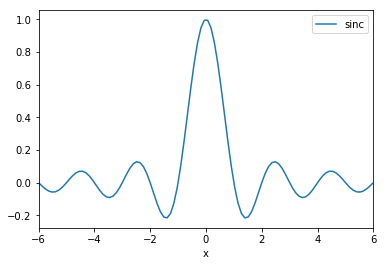

In [5]:
df.plot.line(x='x', y='sinc')

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

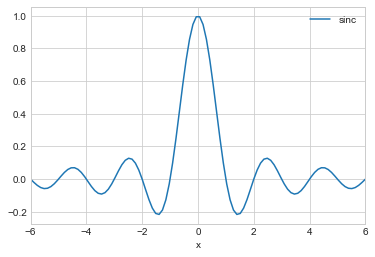

In [8]:
plt.style.use('seaborn-whitegrid')
df.plot.line(x='x', y='sinc')

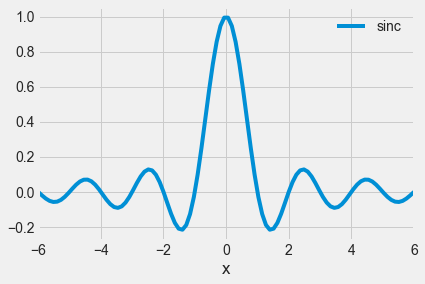

In [9]:
plt.style.use('fivethirtyeight')
df.plot.line(x='x', y='sinc')

# use styles

In [10]:
from sklearn.datasets import load_boston
import pandas as pd

In [11]:
boston = load_boston()

In [12]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['price'] = boston['target']

In [13]:
hdf = df.head(10)
hdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [14]:
hdf.style.highlight_max()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [15]:
hdf.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [16]:
hdf.style.bar()

/Users/smarthome/anaconda/envs/techtalent/lib/python3.6/site-packages/pandas/io/formats/style.py:891: RuntimeWarning: invalid value encountered in double_scalars
  zero_normed = width * (0 - s.min()) / (s.max() - s.min())


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [17]:
def odd_green(val):
    if val % 2 != 0:
        return 'color: green'
    return ''

In [18]:
hdf.style.applymap(odd_green)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [19]:
def orange10(val):
    if val > 10:
        return 'background-color: orange'
    return ''

In [20]:
hdf.style.applymap(odd_green).applymap(orange10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [21]:
hdf.style.applymap(odd_green, subset=['ZN', 'RAD'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [22]:
def top20(col):
    is_top20 = col > col.quantile(.8)
    return ['font-weight: bold' if v else '' for v in is_top20]

In [23]:
hdf.style.apply(top20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9


In [28]:
import qgrid

In [29]:
qgrid.nbinstall()

In [30]:
qgrid.show_grid(hdf)

Widget Javascript not detected.  It may not be installed or enabled properly.


# customize pandas output

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [32]:
xs = np.linspace(-6, 6, 100)
ys = np.sinc(xs)

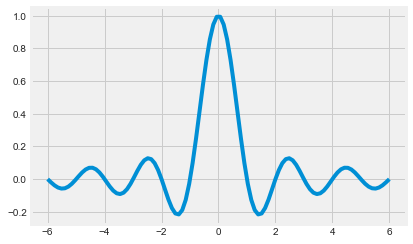

In [33]:
plt.plot(xs, ys)

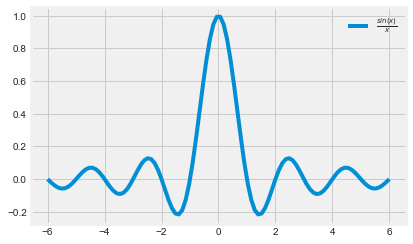

In [34]:
plt.plot(xs, ys, label=r'$\frac{sin(x)}{x}$')
plt.legend()

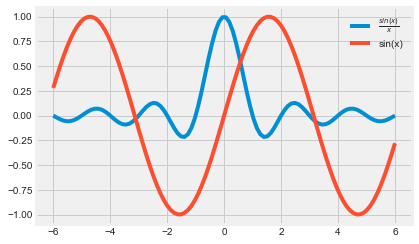

In [35]:
plt.plot(xs, ys, label=r'$\frac{sin(x)}{x}$')
plt.plot(xs, np.sin(xs), label='sin(x)')
plt.legend()

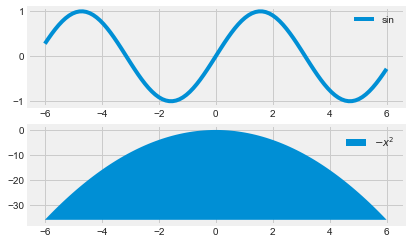

In [36]:
plt.subplot(2, 1, 1)
plt.plot(xs, np.sin(xs), label='sin')
plt.legend()
plt.subplot(2, 1, 2)
plt.fill(xs, -xs**2, label=r'${-x}^2$')
plt.legend()

# use matplotlib

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


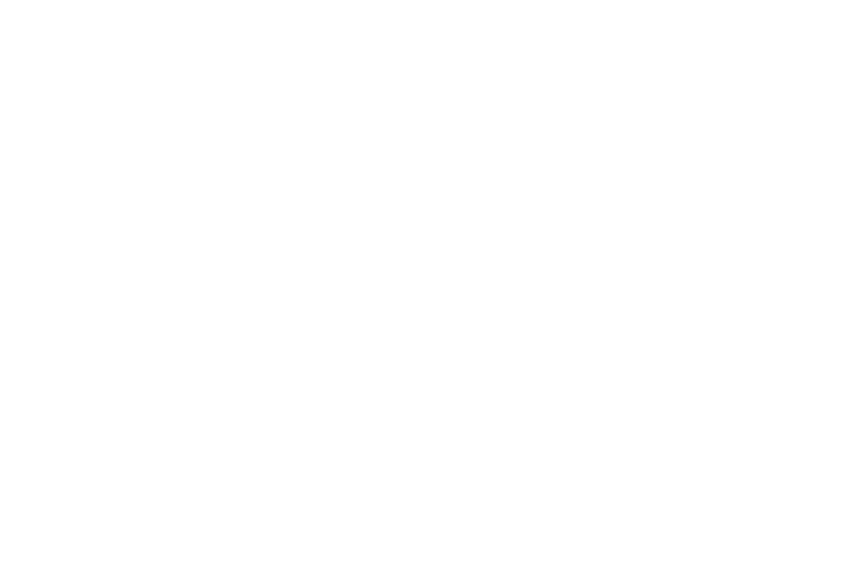

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1156667b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1156b1ef0>], dtype=object)

<IPython.core.display.Javascript object>


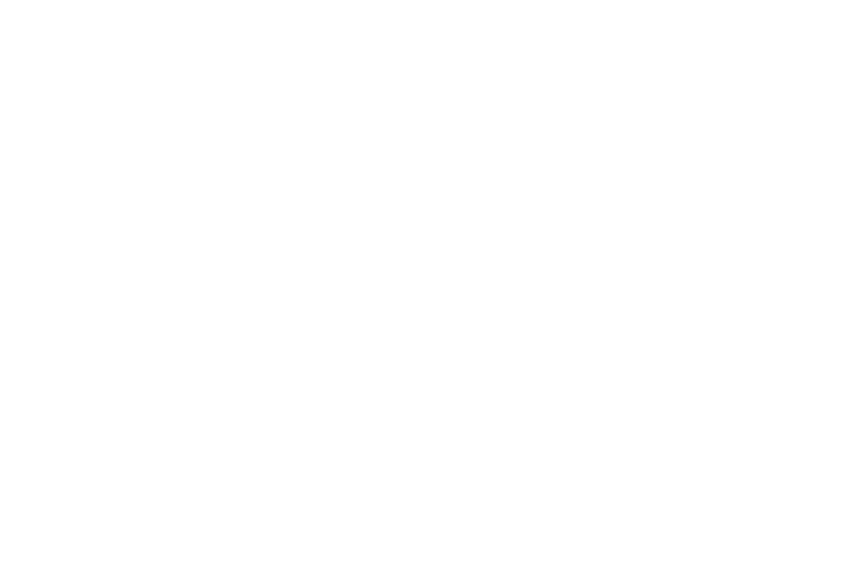

In [39]:
import pandas as pd
df = pd.read_csv('lnkd.csv', parse_dates=['Date'], index_col='Date')
df[['Close', 'Volume']].plot(subplots=True)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv('lnkd.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-07,195.95,195.98,195.94,195.96,3024607
2016-12-06,195.28,195.95,195.26,195.94,4005017
2016-12-05,195.25,195.40,195.25,195.25,1184931
2016-12-02,195.25,195.35,195.17,195.20,1520838
2016-12-01,195.22,195.40,195.14,195.31,1683012


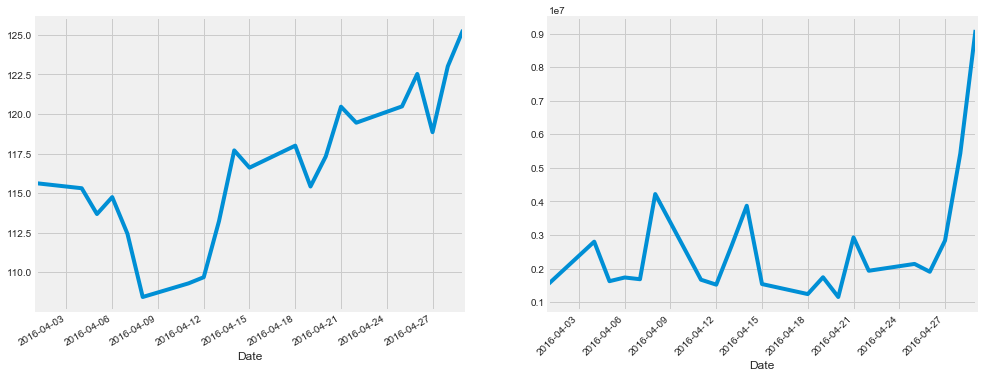

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
df.loc['2016-04', 'Close'].plot(ax=ax1)
df.loc['2016-04', 'Volume'].plot(ax=ax2, rot=45)

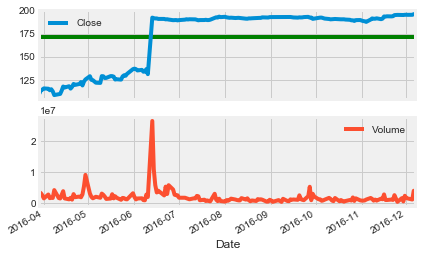

In [43]:
cax, vax = df[['Close', 'Volume']].plot(subplots=True)
xmin, xmax = cax.get_xlim()
cax.hlines(df['Close'].mean(), xmin, xmax, color='green')

In [44]:
from ipywidgets import interact

In [45]:
import numpy as np

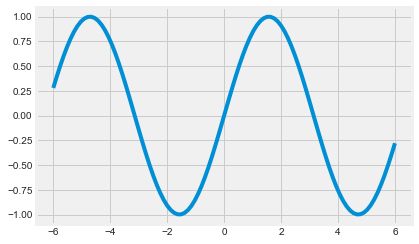

In [46]:
@interact(limit=6)
def plot_sin(limit):
    xs = np.linspace(-limit, limit, 100)
    plt.plot(xs, np.sin(xs), label='sin(x) [{} - {}]'.format(-limit, limit))
    plt.show()

# understand bokeh

In [47]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [48]:
import pandas as pd
df = pd.read_csv('lnkd.csv', parse_dates=['Date'])

In [49]:
from bokeh.plotting import figure, show

In [50]:
fig = figure(x_axis_type='datetime')
fig.line(df['Date'], df['Close'])
show(fig)

In [51]:
from bokeh.io import gridplot

In [52]:
import numpy as np

In [53]:
xs = np.linspace(-5, 5, 100)
fig1 = figure(title='sin(x)', plot_width=300, plot_height=300)
fig1.line(xs, np.sin(xs))
fig2 = figure(x_range=fig1.x_range, y_range=fig1.y_range, title='sinc(x)', plot_width=300, plot_height=300)
fig2.line(xs, np.sinc(xs))
gp = gridplot([[fig1, fig2]])
show(gp)

In [54]:
from bokeh import mpl

/Users/smarthome/anaconda/envs/techtalent/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: MPL compatibility can no longer be successfully maintained, and is now deprecated. All MPL compat functions will be removed completely on the release of Bokeh 1.0. See https://bokeh.pydata.org/en/latest/docs/releases/0.12.5.html for more information
  warn(message)


In [55]:
import matplotlib.pyplot as plt

In [56]:
df['Volume'].plot()
fig = mpl.to_bokeh(plt.gcf())
show(fig)